In [2]:
# Importing libraries
import pandas as pd
def recommendation():
    
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    df['Title'] = df['title'].str.split('(').str[0]
    print("Enter rating w/wo <rating> or random for book suggestion")
    search= input("enter to search ")
    if search=="random":
        df_new= df.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!"
    elif "rating" in search:
            search=search.split()
            rate=float(search[1])
            df_rate = df[df['rating'].astype(float) >= rate]
            df_new= df_rate.sample(replace=True)[['Title', 'authors',"rating"]]
            print("Title: ", df_new[['Title']].to_string(index=False, header=False))
            print("Author: ", df_new[['authors']].to_string(index=False, header=False))
            print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
            return "Enjoy!"
print(recommendation())

Enter rating w/wo <rating> or random for book suggestion
Title:  The Mark of the Crown 
Author:  Jude Watson
Rating:  3.73
Enjoy!


In [17]:
def plot_top5_highest_avg(df:pd.DataFrame):
    author_count_num = df.groupby(['authors'], as_index=False).agg({'rating':'mean'})
    df_new = author_count_num.sort_values(by=['rating'], ascending=False)
    df_new.head(5).plot(x='authors', y='rating',kind='bar')

In [15]:
def clean_data():
    df = pd.read_csv("books.csv", index_col="bookID")
    df.drop([12224, 16914, 22128, 34889], inplace = True, axis=0)
    df['rating'] = df['rating'].astype('float64')
    df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
    df['num_pages'] = df['num_pages'].astype('int')
    df = df.dropna(axis=1,how='all')
    return df

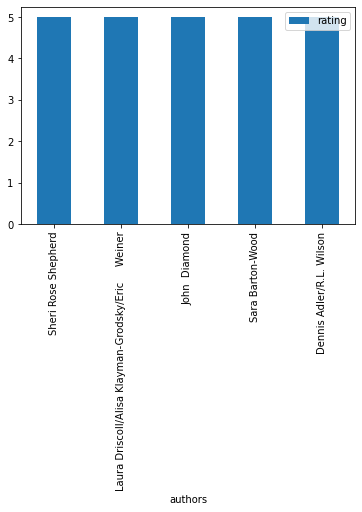

In [18]:
df = clean_data()
plot_top5_highest_avg(df)


In [2]:
import pandas as pd
df = pd.read_csv("books.csv")
df = df.dropna(axis=1,how='all')
df

,bookID,title,authors,rating,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164
...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95
11125,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139
